# MOVIE REVIEW SENTIMENT ANALYSIS USING NLP and K-NN Algorithm

## **Background**
Dalam industri perfilman, ulasan penonton menjadi faktor penting yang mempengaruhi kesuksesan sebuah film. Ulasan ini tidak hanya memberikan pandangan tentang kualitas film tetapi juga membantu menarik lebih banyak penonton melalui rekomendasi dari mulut ke mulut dan platform ulasan online. Dataset "Movie Reviews" yang terdiri dari 32.937 ulasan positif dan 31.783 ulasan negatif menawarkan wawasan berharga tentang sentimen penonton terhadap berbagai film. Dataset ini mencakup beberapa kolom seperti `fold_id`, `cv_tag`, `html_id`, `sent_id`, `text`, dan `tag`, dengan `tag` sebagai target yang berisi label positif dan negatif. Analisis sentimen pada ulasan ini bisa memberikan wawasan mendalam mengenai persepsi publik terhadap film, yang sangat berguna bagi studio, distributor, dan pemasar dalam industri film.

## **Masalah Bisnis**
Studio film dan perusahaan distribusi menghadapi tantangan besar dalam memahami dan mengelola ulasan film dari berbagai platform online. Mengingat volume besar ulasan yang dihasilkan setiap hari, sulit bagi perusahaan untuk secara manual mengidentifikasi tren sentimen yang penting. Kurangnya pemahaman yang cepat dan akurat tentang sentimen penonton dapat menyebabkan keputusan yang tidak optimal, baik dalam hal pemasaran, distribusi, maupun produksi film di masa depan. Selain itu, kesalahan dalam menilai sentimen penonton bisa mengakibatkan strategi pemasaran yang tidak tepat, yang dapat berdampak negatif pada performa box office dan reputasi film.

## **Goal**
Tujuan dari penggunaan dataset "Movie Reviews" adalah untuk mengembangkan model analisis sentimen yang mampu secara otomatis mengklasifikasikan ulasan film sebagai positif atau negatif. Dengan model ini, perusahaan dapat:
1. **Meningkatkan Pemahaman Sentimen Penonton:** Mendapatkan wawasan mendalam tentang bagaimana penonton merespons film tertentu, yang dapat digunakan untuk mengukur keberhasilan film dan menentukan strategi pemasaran yang lebih efektif.
2. **Mengidentifikasi Tren dan Pola Sentimen:** Menganalisis pola sentimen terhadap berbagai genre atau film dari waktu ke waktu untuk mendukung keputusan bisnis terkait produksi dan distribusi film.
3. **Mengoptimalkan Strategi Pemasaran:** Menggunakan hasil analisis sentimen untuk menyesuaikan kampanye pemasaran, dengan fokus pada elemen yang disukai atau mengatasi kritik yang umum dari penonton.

Dengan mencapai tujuan ini, perusahaan dapat meningkatkan efisiensi operasional dan pengambilan keputusan, serta memaksimalkan dampak positif ulasan film terhadap kesuksesan komersial film tersebut.

# Movie Review Sentiment Analysis Dataset: Project Pipeline

The various steps involved in the Machine Learning Pipeline are:

- Import Necessary Dependencies
- Read and Load the Dataset
- Exploratory Data Analysis
- Data Visualization of Target Variables
- Data Celaning Process
- Splitting our data into Train and Test sets.
- Transforming Dataset using TF-IDF Vectorizer
- Function for Model Evaluation
- Model Building



Referensi :
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

https://github.com/yrtnsari/Sentiment-Analysis-NLP-with-Python/blob/main/shopee2021.ipynb


## Step-1: Import the Necessary Dependencies

## Step-2: Read and Load the Dataset

In [37]:
import pandas as pd
path = "D:\\1.Data Science\\project\\movie_review\\movie_review.csv"
df = pd.read_csv(path)

In [38]:
df

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos
...,...,...,...,...,...,...
64715,9,cv999,14636,20,that lack of inspiration can be traced back to...,neg
64716,9,cv999,14636,21,like too many of the skits on the current inca...,neg
64717,9,cv999,14636,22,"after watching one of the "" roxbury "" skits on...",neg
64718,9,cv999,14636,23,"bump unsuspecting women , and . . . that's all .",neg


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64720 entries, 0 to 64719
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fold_id  64720 non-null  int64 
 1   cv_tag   64720 non-null  object
 2   html_id  64720 non-null  int64 
 3   sent_id  64720 non-null  int64 
 4   text     64720 non-null  object
 5   tag      64720 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.0+ MB


In [40]:
df

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos
...,...,...,...,...,...,...
64715,9,cv999,14636,20,that lack of inspiration can be traced back to...,neg
64716,9,cv999,14636,21,like too many of the skits on the current inca...,neg
64717,9,cv999,14636,22,"after watching one of the "" roxbury "" skits on...",neg
64718,9,cv999,14636,23,"bump unsuspecting women , and . . . that's all .",neg


## Step-3: Exploratory Data Analysis

3.1: Five top records of data

In [41]:
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


3.2: Columns/features in data

In [42]:
df.columns

Index(['fold_id', 'cv_tag', 'html_id', 'sent_id', 'text', 'tag'], dtype='object')

3.3: Length of the dataset

In [43]:
print('length of data is', len(df))

length of data is 64720


3.4: Shape of data

In [44]:
df. shape

(64720, 6)

3.5: Data information

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64720 entries, 0 to 64719
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fold_id  64720 non-null  int64 
 1   cv_tag   64720 non-null  object
 2   html_id  64720 non-null  int64 
 3   sent_id  64720 non-null  int64 
 4   text     64720 non-null  object
 5   tag      64720 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.0+ MB


3.6: Datatypes of all columns

In [46]:
df.dtypes

fold_id     int64
cv_tag     object
html_id     int64
sent_id     int64
text       object
tag        object
dtype: object

3.7: Checking for null values

In [47]:
import numpy as np
np.sum(df.isnull().any(axis=1))

0

3.8: Rows and columns in the dataset

In [48]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   64720


3.9: Check unique target values

In [49]:
df['tag'].unique()

array(['pos', 'neg'], dtype=object)

3.10: Check the number of target values

In [50]:
df['tag'].nunique()

2

## Step-4: Data Visualization of Target Variables

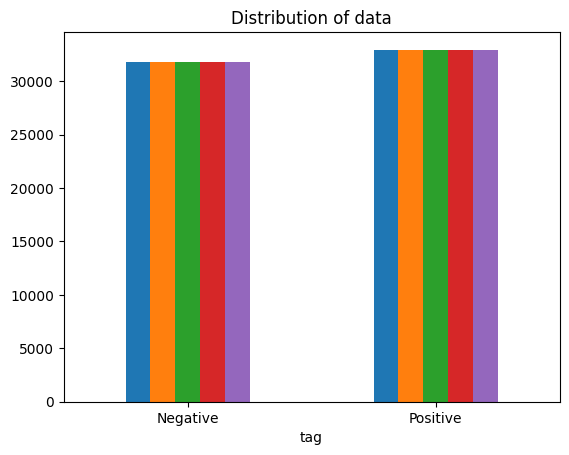

In [51]:
# Plotting the distribution for dataset.
ax = df.groupby('tag').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['tag'])

Have balanced data

Perform encoding by creating a new column as a target that has been encoded

In [52]:
def categorize_tag(tag):
    if tag == "pos":
        return 1
    else:
        return 0

# Buat kolom baru 'target' dan isi dengan nilai hasil dari fungsi categorize_tag
df['target'] = df['tag'].apply(categorize_tag)

# Tampilkan DataFrame hasil
display(df)


,fold_id,cv_tag,html_id,sent_id,text,tag,target
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos,1
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos,1
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos,1
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos,1
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos,1
...,...,...,...,...,...,...,...
64715,9,cv999,14636,20,that lack of inspiration can be traced back to...,neg,0
64716,9,cv999,14636,21,like too many of the skits on the current inca...,neg,0
64717,9,cv999,14636,22,"after watching one of the "" roxbury "" skits on...",neg,0
64718,9,cv999,14636,23,"bump unsuspecting women , and . . . that's all .",neg,0


<Axes: xlabel='target', ylabel='count'>

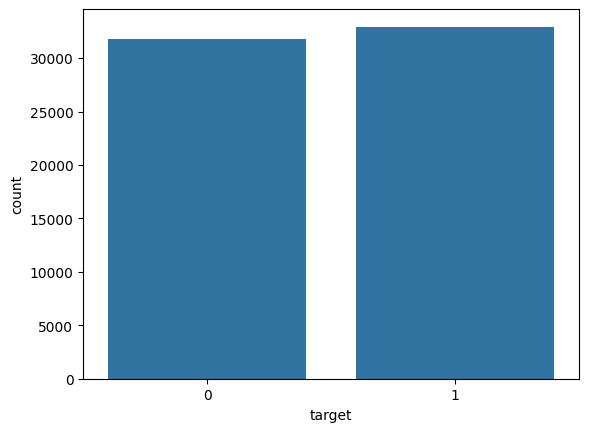

In [53]:
import seaborn as sns
sns.countplot(x='target', data=df)

## Step-5: Preprocessing Data

In [54]:
data = df[["text","target"]]
data

,text,target
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1
...,...,...
64715,that lack of inspiration can be traced back to...,0
64716,like too many of the skits on the current inca...,0
64717,"after watching one of the "" roxbury "" skits on...",0
64718,"bump unsuspecting women , and . . . that's all .",0


In [55]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def clean_text(text):
    # Menghapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Menghapus mentions dan hashtag
    text = re.sub(r'\@\w+|\#', '', text)

    # Menghapus angka
    text = re.sub(r'\d+', '', text)

    # Menghapus karakter non-alphabetic (karakter khusus, tanda baca, dll.)
    text = re.sub(r'\W', ' ', text)

    # Menghapus karakter tunggal (misalnya 'b', 'c', dll.)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Menghapus spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    # Mengubah ke huruf kecil
    text = text.lower()

    # Tokenisasi
    text = word_tokenize(text)

    # Menghapus stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]

    # Menggabungkan kembali teks yang telah dibersihkan menjadi satu string
    return ' '.join(text)

# Terapkan fungsi pembersihan pada kolom 'text'
data.loc[:,'clean_text'] = data['text'].apply(clean_text)

# Menampilkan hasil pembersihan
print(data[['text', 'clean_text']].head())


                                                text  \
0  films adapted from comic books have had plenty...   
1  for starters , it was created by alan moore ( ...   
2  to say moore and campbell thoroughly researche...   
3  the book ( or " graphic novel , " if you will ...   
4  in other words , don't dismiss this film becau...   

                                          clean_text  
0  film adapted comic book plenty success whether...  
1  starter created alan moore eddie campbell brou...  
2  say moore campbell thoroughly researched subje...  
3  book graphic novel page long includes nearly c...  
4                           word dismiss film source  


C:\Users\DELL\AppData\Local\Temp\ipykernel_11380\4252185749.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'clean_text'] = data['text'].apply(clean_text)


## Step-6 Representasi Teks (convert to numerik) Using TF-IDF (Term Frequency-Inverse Document Frequency)

- Konsep: TF-IDF adalah metode yang mempertimbangkan frekuensi kemunculan kata dalam dokumen (Term Frequency, TF) dan juga memperhatikan seberapa unik kata tersebut dalam seluruh korpus (Inverse Document Frequency, IDF). Kata yang sering muncul dalam beberapa dokumen tetapi jarang muncul di dokumen lain dianggap lebih penting.

In [331]:
# !pip install scikit-learn

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Terapkan ke teks yang telah dibersihkan
X_tfidf = tfidf_vectorizer.fit_transform(data['clean_text']).toarray()

# Menampilkan beberapa kata fitur yang dihasilkan
print(tfidf_vectorizer.get_feature_names_out()[:10])
print(X_tfidf[:5])  # Menampilkan vektor dari beberapa dokumen pertama


MemoryError: Unable to allocate 2.41 GiB for an array with shape (64720, 5000) and data type float64

## Step 7 Modelling

###  Pembagian Data (Train-Test Split)

In [21]:
from sklearn.model_selection import train_test_split

# X adalah fitur (TF-IDF representation of the text)
X = X_tfidf

# y adalah target (label sentimen)
y = data['target']

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Support Vector Machine (SVM)

In [23]:
from sklearn.svm import LinearSVC

# Inisialisasi model SVM
svm_model = LinearSVC()

# Melatih model dengan data latih
svm_model.fit(X_train, y_train)



LinearSVC()

In [24]:

y_train_pred_svm = svm_model.predict(X_train)

# Mengukur akurasi
svm_Train_accuracy = accuracy_score(y_train, y_train_pred_svm)
print(f'Akurasi SVM train : {svm_Train_accuracy}')

# Matriks kebingungan
svm_cm_train = confusion_matrix(y_train, y_train_pred_svm)
print('Confusion Matrix SVM train:')
print(svm_cm_train)

# Laporan klasifikasi
svm_report_train = classification_report(y_train, y_train_pred_svm)
print('Classification Report SVM train:')
print(svm_report_train)


Akurasi SVM train : 0.7393773176761433
Confusion Matrix SVM train:
[[18835  6577]
 [ 6917 19447]]
Classification Report SVM train:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74     25412
           1       0.75      0.74      0.74     26364

    accuracy                           0.74     51776
   macro avg       0.74      0.74      0.74     51776
weighted avg       0.74      0.74      0.74     51776



In [25]:

y_test_pred_svm = svm_model.predict(X_test)

# Mengukur akurasi
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
print(f'Akurasi SVM: {svm_test_accuracy}')

# Matriks kebingungan
svm_cm = confusion_matrix(y_test, y_test_pred_svm)
print('Confusion Matrix SVM tesing:')
print(svm_cm)

# Laporan klasifikasi
svm_report = classification_report(y_test, y_test_pred_svm)
print('Classification Report SVM testing:')
print(svm_report)


Akurasi SVM: 0.672048825710754
Confusion Matrix SVM tesing:
[[4258 2113]
 [2132 4441]]
Classification Report SVM testing:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      6371
           1       0.68      0.68      0.68      6573

    accuracy                           0.67     12944
   macro avg       0.67      0.67      0.67     12944
weighted avg       0.67      0.67      0.67     12944



### LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

# Melatih model dengan data latih
logistic_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [27]:
# Evaluasi model pada data uji
y_train_pred_logistic = logistic_model.predict(X_train)

# Mengukur akurasi
logistic_train_accuracy = accuracy_score(y_train, y_train_pred_logistic)
print(f'Akurasi Logistic Regression train: {logistic_train_accuracy}')

# Matriks kebingungan
logistic_cm_train = confusion_matrix(y_train, y_train_pred_logistic)
print('Confusion Matrix Logistic Regression train:')
print(logistic_cm_train)

# Laporan klasifikasi
logistic_report_train = classification_report(y_train, y_train_pred_logistic)
print('Classification Report Logistic Regression train:')
print(logistic_report_train)


Akurasi Logistic Regression train: 0.7308791718170581
Confusion Matrix Logistic Regression train:
[[18360  7052]
 [ 6882 19482]]
Classification Report Logistic Regression train:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     25412
           1       0.73      0.74      0.74     26364

    accuracy                           0.73     51776
   macro avg       0.73      0.73      0.73     51776
weighted avg       0.73      0.73      0.73     51776



In [28]:
# Evaluasi model pada data uji
y_pred_logistic = logistic_model.predict(X_test)

# Mengukur akurasi
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Akurasi Logistic Regression: {logistic_accuracy}')

# Matriks kebingungan
logistic_cm = confusion_matrix(y_test, y_pred_logistic)
print('Confusion Matrix Logistic Regression:')
print(logistic_cm)

# Laporan klasifikasi
logistic_report = classification_report(y_test, y_pred_logistic)
print('Classification Report Logistic Regression:')
print(logistic_report)


Akurasi Logistic Regression: 0.6722033374536465
Confusion Matrix Logistic Regression:
[[4222 2149]
 [2094 4479]]
Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      6371
           1       0.68      0.68      0.68      6573

    accuracy                           0.67     12944
   macro avg       0.67      0.67      0.67     12944
weighted avg       0.67      0.67      0.67     12944



### KNN


In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Anda bisa menyesuaikan n_neighbors sesuai kebutuhan
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [30]:
# Prediksi pada data uji
y_pred_train_knn = knn_model.predict(X_train)

# Mengukur akurasi
accuracy_knn_train = accuracy_score(y_train, y_pred_train_knn)
print(f'Akurasi Decision Tree: {accuracy_knn_train}')

# Matriks kebingungan
cm_knn_train = confusion_matrix(y_train, y_pred_train_knn)
print('Confusion Matrix Decision Tree:')
print(cm_knn_train)

# Laporan klasifikasi
report_knn_train = classification_report(y_train, y_pred_train_knn)
print('Classification Report Decision Tree:')
print(report_knn_train)

Akurasi Decision Tree: 0.9223771631644005
Confusion Matrix Decision Tree:
[[23336  2076]
 [ 1943 24421]]
Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     25412
           1       0.92      0.93      0.92     26364

    accuracy                           0.92     51776
   macro avg       0.92      0.92      0.92     51776
weighted avg       0.92      0.92      0.92     51776



In [31]:
# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# Mengukur akurasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Akurasi Decision Tree: {accuracy_knn}')

# Matriks kebingungan
cm_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix Decision Tree:')
print(cm_knn)

# Laporan klasifikasi
report_knn = classification_report(y_test, y_pred_knn)
print('Classification Report Decision Tree:')
print(report_knn)

Akurasi Decision Tree: 0.5143695920889988
Confusion Matrix Decision Tree:
[[5581  790]
 [5496 1077]]
Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.50      0.88      0.64      6371
           1       0.58      0.16      0.26      6573

    accuracy                           0.51     12944
   macro avg       0.54      0.52      0.45     12944
weighted avg       0.54      0.51      0.44     12944



### naive_bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Melatih model dengan data latih
model.fit(X_train, y_train)


MultinomialNB()

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi pada data latih
y_train_pred_nn = model.predict(X_train)

# Mengukur akurasi pada data latih
train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
print(f'Akurasi pada Data Latih: {train_accuracy_nn}')

# Matriks kebingungan pada data latih
train_cm = confusion_matrix(y_train, y_train_pred_nn)
print('Confusion Matrix pada Data Latih:')
print(train_cm)

# Laporan klasifikasi pada data latih
train_report = classification_report(y_train, y_train_pred_nn)
print('Classification Report pada Data Latih:')
print(train_report)


Akurasi pada Data Latih: 0.71726282447466
Confusion Matrix pada Data Latih:
[[17547  7865]
 [ 6774 19590]]
Classification Report pada Data Latih:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71     25412
           1       0.71      0.74      0.73     26364

    accuracy                           0.72     51776
   macro avg       0.72      0.72      0.72     51776
weighted avg       0.72      0.72      0.72     51776



In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi pada data uji
y_test_pred_nn = model.predict(X_test)

# Mengukur akurasi
accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
print(f'Akurasi: {accuracy_nn}')

# Matriks kebingungan
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
print('Confusion Matrix:')
print(cm_nn)

# Laporan klasifikasi
report_nn = classification_report(y_test, y_test_pred_nn)
print('Classification Report:')
print(report_nn)


Akurasi: 0.6722033374536465
Confusion Matrix:
[[4124 2247]
 [1996 4577]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      6371
           1       0.67      0.70      0.68      6573

    accuracy                           0.67     12944
   macro avg       0.67      0.67      0.67     12944
weighted avg       0.67      0.67      0.67     12944



Dari Hasil Diatas model Naive Bayes menjadi model yang terbaik di antara beberapa model dengan Akurasi pada Data Latih: 0.71 dan data testing yaitu Akurasi: 0.67  maka dari itu kita akan melakukan hyper parameter tunning pada model naive bayes